# Application of PCA

* Two important techniques we have learn: visualization and clustering
* Additionally, you will learn how to evaluate clustering methods

### Review of PCA

PCA is a dimensionality reduction technique, the dataset's features are transformed into a new set of variables known as principal components.  Think of them as dimensions in a new feature space.

These components are linear combinations of the original features and are derived in such a way that they capture the maximum variance in the data, under the constraint that they are orthogonal to each other.

This orthogonality property has several important implications:

1. **Maximizing Variance**: PCA ensures that the reduced feature space maximally preserves the variability present in the original dataset.  First component is the dimension with maximal variance and is orthorgonal with the other dimensions.

2. **Uncorrelated Features**: Orthogonality between principal components implies that these components are uncorrelated with each other. This is beneficial for many machine learning algorithms.

3. **Interpretation**: The orthogonality of principal components facilitates the interpretation of the reduced dimensionality data. Since each principal component represents variance along directions orthogonal to other components, it simplifies understanding the structure of the data by analyzing each component individually.

4. **Optimal Subspace**: By capturing the maximum possible variance in each successive principal component, under the constraint of orthogonality, PCA effectively finds the optimal subspace for representing the original data. This optimal subspace can significantly reduce the dimensions of the data with minimal loss of information.

PCA is a powerful tool for feature extraction and dimensionality reduction.

#### Visualization analysis

In [3]:
import pandas, seaborn
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler, MinMaxScaler

df = pandas.read_csv('../Datasets/breast-cancer-wisconsin.csv').dropna()
df.sample(3)

,clump_thickness,cell_size_uniformity,cell_shape_uniformity,marginal_adhesion,epithelial,bare_nuclei,blan_chromatin,normal_nucleoli,mitoses,class
679,2,1,1,1,2,1,1,1,1,2
656,2,1,1,1,2,1,3,1,1,2
554,10,10,8,10,6,5,10,3,1,4


In [5]:
features = df.drop(columns=['class'])
features.sample()

,clump_thickness,cell_size_uniformity,cell_shape_uniformity,marginal_adhesion,epithelial,bare_nuclei,blan_chromatin,normal_nucleoli,mitoses
218,10,5,5,6,3,10,7,9,2


In [13]:
pca = PCA()
features_pca = pandas.DataFrame(
    pca.fit_transform(features)
)
features_pca.var()

0    49.047366
1     5.110720
2     4.301575
3     3.155201
4     2.770569
5     2.446232
6     1.796710
7     1.595715
8     0.806801
dtype: float64

In [16]:
pca.explained_variance_ratio_[0:2].sum()

0.7624582285922413

In [18]:
features.var()/features.var().sum()

clump_thickness          0.112017
cell_size_uniformity     0.132268
cell_shape_uniformity    0.125743
marginal_adhesion        0.115523
epithelial               0.069577
bare_nuclei              0.186928
blan_chromatin           0.084485
normal_nucleoli          0.131193
mitoses                  0.042266
dtype: float64

### Let's explore this dataset

Pick two variables and explore.


In [20]:
import warnings
warnings.filterwarnings('ignore')

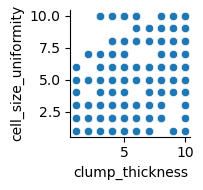

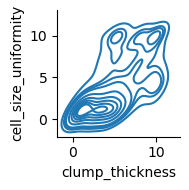

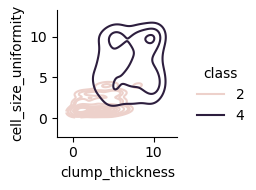

In [23]:


seaborn.relplot(data=df, x='clump_thickness', y='cell_size_uniformity', height=2)
seaborn.displot(data=df, x='clump_thickness', y='cell_size_uniformity', kind='kde', height=2)
seaborn.displot(data=df, x='clump_thickness', y='cell_size_uniformity', kind='kde', hue='class', height=2)

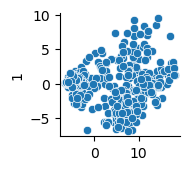

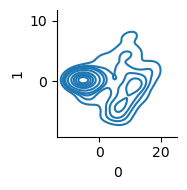

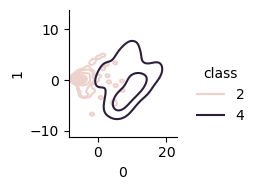

In [26]:
# features = df.drop(columns=['class'])
# standardized_features = StandardScaler().fit_transform(features)

pca = PCA()
pca_features = pandas.DataFrame(
    pca.fit_transform( features )
)

seaborn.relplot(data=pca_features, x=0, y=1, height=2)
seaborn.displot(data=pca_features, x=0, y=1, kind='kde', height=2)
seaborn.displot(data=pca_features, x=0, y=1, kind='kde', hue=df['class'], height=2)

In [27]:
from scipy.stats import pearsonr

In [36]:
for i in range(9):
    for f in features:
        r, pvalue = pearsonr(features[f], pca_features[i])
        print(i, f, round(r,2))
    print()

0 clump_thickness 0.74
0 cell_size_uniformity 0.92
0 cell_shape_uniformity 0.92
0 marginal_adhesion 0.81
0 epithelial 0.79
0 bare_nuclei 0.85
0 blan_chromatin 0.84
0 normal_nucleoli 0.81
0 mitoses 0.5

1 clump_thickness -0.06
1 cell_size_uniformity 0.17
1 cell_shape_uniformity 0.12
1 marginal_adhesion -0.08
1 epithelial 0.2
1 bare_nuclei -0.48
1 blan_chromatin 0.01
1 normal_nucleoli 0.35
1 mitoses 0.25

2 clump_thickness -0.63
2 cell_size_uniformity -0.02
2 cell_shape_uniformity -0.05
2 marginal_adhesion 0.34
2 epithelial 0.03
2 bare_nuclei 0.05
2 blan_chromatin 0.1
2 normal_nucleoli 0.09
2 mitoses 0.03

3 clump_thickness 0.03
3 cell_size_uniformity 0.17
3 cell_shape_uniformity 0.12
3 marginal_adhesion 0.24
3 epithelial 0.15
3 bare_nuclei -0.14
3 blan_chromatin -0.03
3 normal_nucleoli -0.44
3 mitoses 0.15

4 clump_thickness -0.24
4 cell_size_uniformity 0.18
4 cell_shape_uniformity 0.21
4 marginal_adhesion -0.37
4 epithelial 0.15
4 bare_nuclei 0.08
4 blan_chromatin 0.06
4 normal_nucleol

### Clustering Analysis

In [37]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

model = KMeans(n_clusters=2, n_init=10, random_state=2024)
model.fit(features)

# seaborn.relplot(data=df, x='clump_thickness', y='cell_size_uniformity', hue=model.labels_, height=2)
# seaborn.displot(data=df, x='clump_thickness', y='cell_size_uniformity', hue=model.labels_, kind='kde', height=2)


KMeans(n_clusters=2, n_init=10, random_state=2024)

### Clustering principal components

We will have two new features with the highest variance.

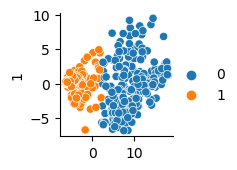

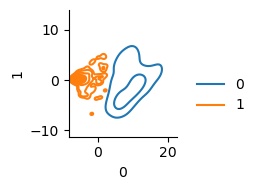

In [40]:

model = KMeans(n_clusters=2, n_init=10, random_state=2024)
model.fit(pca_features)

seaborn.relplot(data=pca_features, x=0, y=1, hue=model.labels_, height=2)
seaborn.displot(data=pca_features, x=0, y=1, hue=model.labels_, kind='kde', height=2)

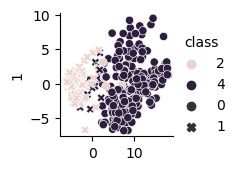

In [45]:
seaborn.relplot(data=pca_features, x=0, y=1, style=model.labels_, hue=df['class'], 
                height=2)
# seaborn.displot(data=pca_features, x=0, y=1, col=model.labels_, kind='kde', height=2,
#                 hue=df['class']
#                )

### Objective Evaluation of Clustering Performance

Often, we don't have a "ground truth" (e.g. species) to evaluate the result of a clustering performance.

The silihouette score of a clustering is between -1 (bad) and 1 (good).

This is a combined score of how tight the clusters are and how far they are apart from each other.

In contrast, inertia only measures how tight the clusters are.

In [117]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

model = KMeans(n_clusters=3, n_init=10, random_state=2024)
model.fit(features)
silhouette_score(features, model.predict(features))


0.5256774849851862

#### Silhouette coefficient

$s(x) = {b(x) - a(x) \over b(x)}$.  (Assuming that a(x) < b(x))

* a(x) - the average distance between x and the other points in the same cluster as x.
* b(x) - the smallest average distance between x and points in any other cluster.
* Given a typical dataset and a decent algorithm, a(x) < b(x).


Observations:
* If the cluster containing x is tight, a(x) is small.
* If the cluster containing x is far from the other clusters, b(x) is large.
* If a clustering algorithm does a good job, s(x) is close to 1.

#### Silhouette score

The silhouette score is the average silhouette coefficients of all data points.